# Advanced Statistical Analysis of Diamonds Data

In this notebook, we will run both a **one-way and two-way ANOVA** test. We'll also run a **post hoc** test to analyze the results of a one-way ANOVA test.

* **One-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
* **Two-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.
* **Post hoc test:** Performs a pairwise comparison between all available groups while controlling for the error rate.

We will be using clean and preprocessed versions of the `diamonds` dataset from the `seaborn` package.

In [1]:
# Import statements
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## One-way ANOVA

We will apply a one-way ANOVA test to examine whether the mean prices of diamonds differ significantly across the different color grades.

In [2]:
# Read in the first dataset
diamonds = pd.read_csv("diamonds.csv")

In [3]:
# Examine first 5 rows of the dataset
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


<Axes: xlabel='color', ylabel='log_price'>

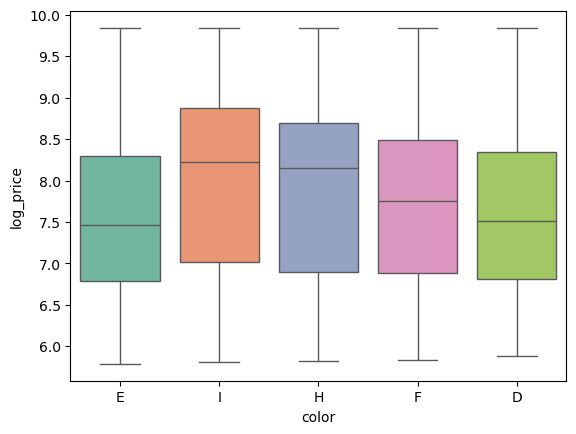

In [4]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = "color", y = "log_price", hue = "color", palette="Set2", data = diamonds)

Based on the plot, we can observe that there is a lot of overlap in the distribution of `log_price` for each color of diamond. But we can't tell yet if they are statistically significantly different.

In order to run ANOVA, we need to create a regression model.

In [5]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

In [6]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Fri, 29 Aug 2025   Prob (F-statistic):          3.61e-225
Time:                        06:49:00   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades' associated beta coefficients all have a p-value of less than 0.05. But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

First, we have to state our null and alternative hypotheses:

#### Null Hypothesis

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color grade.

#### Alternative Hypothesis

$$H_A: \text{NOT } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color grade.

In [7]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [8]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [9]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


Since the p-value of `C(color)` is very small for all `typ`, we can **reject** the null hypothesis that the mean of the price is the same for all diamond color grades.

## Two-way ANOVA

We will apply a two-way ANOVA to evaluate whether the mean price of diamonds differs significantly across both color grades and cut categories, as well as to assess any potential interaction effects between these two factors.

In [10]:
# Read in the second dataset
diamonds2 = pd.read_csv("diamonds2.csv")

In [11]:
# Examine the first 5 rows of the dataset
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [12]:
# Construct a multiple linear regression with an interaction term between color and cut
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

In [13]:
# Get summary statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 29 Aug 2025   Prob (F-statistic):               0.00
Time:                        06:49:00   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05. Additionally, some of the interactions also seem statistically significant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

First, we have to state our three pairs of null and alternative hypotheses:

#### **Null Hypothesis (Color)**

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color.

#### **Alternative Hypothesis (Color)**

$$H_A: \text{NOT } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color.

---

#### **Null Hypothesis (Cut)**

$$H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is no difference in the price of diamonds based on cut.

#### **Alternative Hypothesis (Cut)**

$$H_A: \text{NOT } price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is a difference in the price of diamonds based on cut.

---

#### **Null Hypothesis (Interaction)**

$$H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$$

#### **Alternative Hypothesis (Interaction)**

$$H_A: \text{There is an interaction effect between color and cut on diamond price.}$$

In [14]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [15]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [16]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


Since all of the p-values for all `typ` are very small, we can **reject** all three null hypotheses.

## ANOVA post hoc test

We will conduct a post hoc tests for the one-way ANOVA.

One of the most common ANOVA post hoc tests is the **Tukey's HSD (honestly significantly different) test**.

In [17]:
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

In [19]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Each row represents a pariwise comparison between the prices of two diamond color grades. The `reject` column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

#### **Test 1: D vs. E**
$H_0: price_D=price_E$

The price of D and E color grade diamonds are the same.

$H_A: price_D \neq price_E$

The price of D and E color grade diamonds are not the same.

**Result:** We *cannot* reject the null hypothesis that the price of D and E color grade diamonds are the same.

---

#### **Test 2: D vs. F**
$H_0: price_D=price_F$

The price of D and F color grade diamonds are the same.

$H_A: price_D \neq price_F$

The price of D and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and F color grade diamonds are the same. Diamonds with color grade F have a significantly higher mean price than those with color grade D.

---

#### **Test 3: D vs. H**
$H_0: price_D=price_H$

The price of D and H color grade diamonds are the same.

$H_A: price_D \neq price_H$

The price of D and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and H color grade diamonds are the same. Diamonds with color grade H have a significantly higher mean price than those with color grade D.

---

#### **Test 4: D vs. I**
$H_0: price_D=price_I$

The price of D and I color grade diamonds are the same.

$H_A: price_D \neq price_I$

The price of D and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and I color grade diamonds are the same. Diamonds with color grade I have a significantly higher mean price than those with color grade D.

---

#### **Test 5: E vs. F**
$H_0: price_E=price_F$

The price of E and F color grade diamonds are the same.

$H_A: price_E \neq price_F$

The price of E and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and F color grade diamonds are the same. Diamonds with color grade F have a significantly higher mean price than those with color grade E.

---

#### **Test 6: E vs. H**
$H_0: price_E=price_H$

The price of E and H color grade diamonds are the same.

$H_A: price_E \neq price_H$

The price of E and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same. Diamonds with color grade H have a significantly higher mean price than those with color grade E.

---

#### **Test 7: E vs. I**
$H_0: price_E=price_I$

The price of E and I color grade diamonds are the same.

$H_A: price_E \neq price_I$

The price of E and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same. Diamonds with color grade I have a significantly higher mean price than those with color grade E.

---

#### **Test 8: F vs. H**
$H_0: price_F=price_H$

The price of F and H color grade diamonds are the same.

$H_A: price_F \neq price_H$

The price of F and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same. Diamonds with color grade H have a significantly higher mean price than those with color grade F.

---

#### **Test 9: F vs. I**
$H_A: price_F=price_I$

The price of F and I color grade diamonds are the same.

$H_1: price_F \neq price_I$

The price of F and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same. Diamonds with color grade I have a significantly higher mean price than those with color grade F.

---

#### **Test 10: H vs. I**
$H_A: price_H=price_I$

The price of H and I color grade diamonds are the same.

$H_1: price_H \neq price_I$

The price of H and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same. Diamonds with color grade I have a significantly higher mean price than those with color grade H.

# END